# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd # data processing,CSV file algebra
import numpy as np # linear algebra
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import matplotlib
%matplotlib inline
import os

In [2]:
matplotlib.__version__

'3.4.3'

In [6]:
path = 'C:/Users/santi/HiDrive/users/santina/02_Data Analytics/Bootcamp/06_Advanced-Analytics/02_Data/Clean Data'

In [7]:
df = pd.read_csv(os.path.join(path, 'suicide-rates-cleaned.csv'))

# 2. Data Checks

In [8]:
#first 5 rows in dataframe
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [9]:
#random rows in dataframe
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
8247,El Salvador,2006,male,15-24 years,89,554177,16.06,El Salvador2006,"15,999,886,400",2947,Millenials
5635,Chile,2015,male,5-14 years,9,1275612,0.71,Chile2015,"243,999,477,738",14729,Generation Z
27332,Uruguay,1996,male,15-24 years,48,271740,17.66,Uruguay1996,"20,515,543,039",6914,Generation X
13584,Japan,2003,female,75+ years,1643,6676000,24.61,Japan2003,"4,445,658,071,222",36926,Silent
980,Armenia,1991,female,25-34 years,4,342100,1.17,Armenia1991,"2,068,526,522",640,Boomers


In [10]:
#describe function includes analysis of all our numerical data. For this one: count, mean, std, min, %25, %50, %75, max values are given
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [11]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [12]:
# analyizing min year and max year
min_year=min(df.year)
max_year=max(df.year)
print ('Min Year:', min_year)
print ('Max Year:', max_year)

Min Year: 1985
Max Year: 2016


In [13]:
df.shape

(27820, 11)

In [14]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [52]:
df_men = df[df.sex == 'male']
print (df_men)

          country  year   sex          age  suicides_no  population  \
0         Albania  1987  male  15-24 years           21      312900   
1         Albania  1987  male  35-54 years           16      308000   
3         Albania  1987  male    75+ years            1       21800   
4         Albania  1987  male  25-34 years            9      274300   
8         Albania  1987  male  55-74 years            1      137500   
...           ...   ...   ...          ...          ...         ...   
27809  Uzbekistan  2014  male  25-34 years          318     2739150   
27811  Uzbekistan  2014  male  55-74 years          144     1271111   
27812  Uzbekistan  2014  male  15-24 years          347     3126905   
27813  Uzbekistan  2014  male    75+ years           17      224995   
27817  Uzbekistan  2014  male   5-14 years           60     2762158   

       suicides/100k pop    country-year  gdp_for_year ($)   \
0                   6.71     Albania1987      2,156,624,900   
1                   5

# 3. Exploring Relationships

## Correlations

### Heatmap

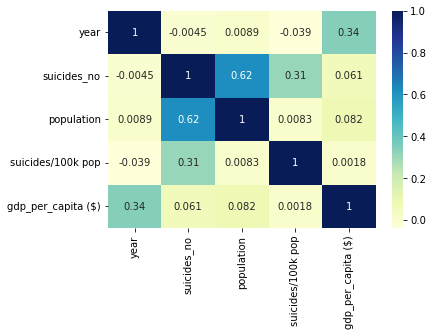

In [33]:
# creating a heatmap with seaborn for the numeric variables
corr = sns.heatmap(df.corr(), cmap ='YlGnBu', annot = True)
plt.show()

There are *moderate correlations* between (r = > .30, < .50)
- GDP per capita and year
- number of suicides and suicides/100k pop

There are *high correlations* between (r = <.50)
- suicide number and population

### Scatterplot

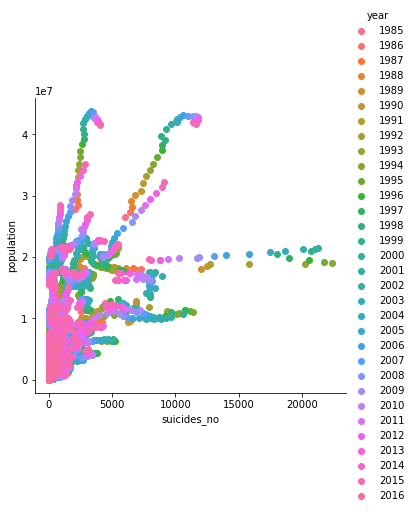

In [19]:
sns.FacetGrid(df, hue='year', height=5).map(plt.scatter,'suicides_no', 'population').add_legend()
plt.show()

The pink and violet colors refer to the years between 2008 and 2016. We can see that these colours are mostly in the corner of the graph meaning the suicide numbers are lower between 2008 and 2016 than in earlier years.

### Pairplots

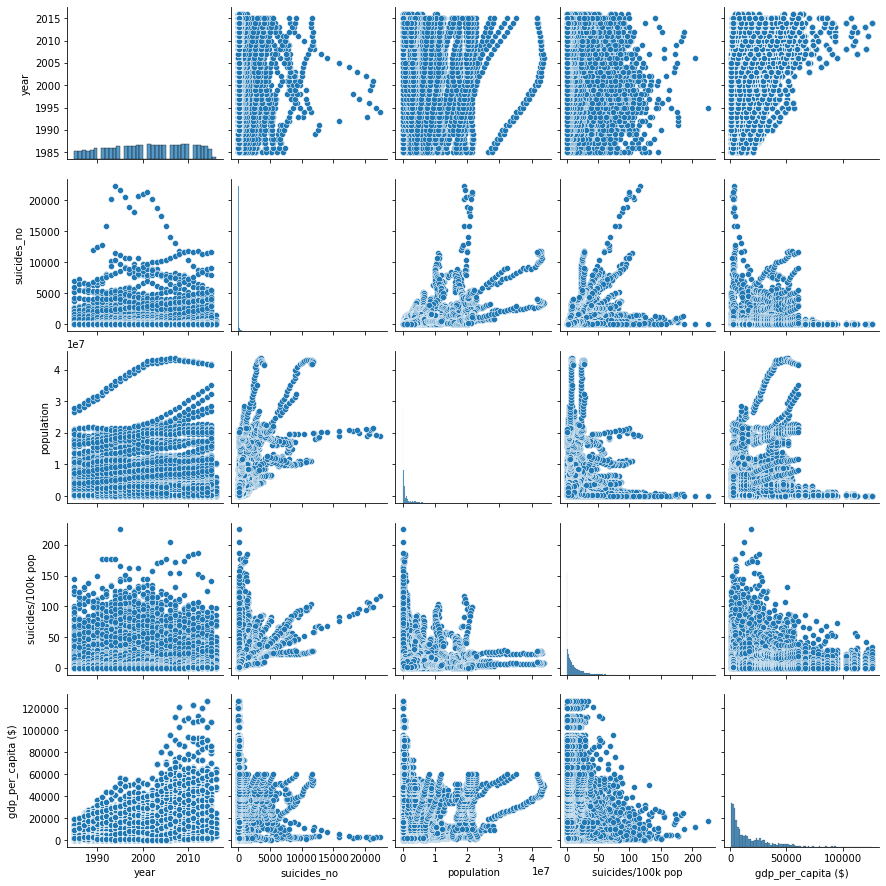

In [20]:
# Creating a pairplot for the whole dataframe
g = sns.pairplot(df)

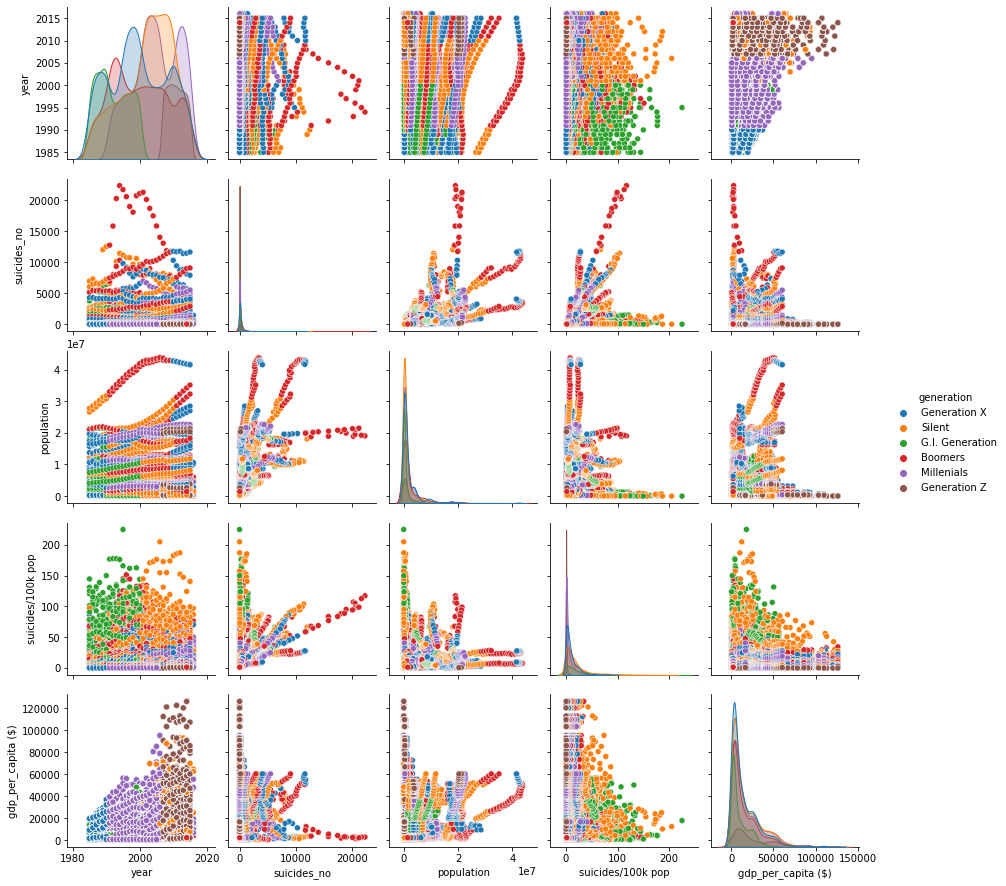

In [23]:
# creating a pairplot for generation
sns.pairplot(df,hue='generation')
plt.show()

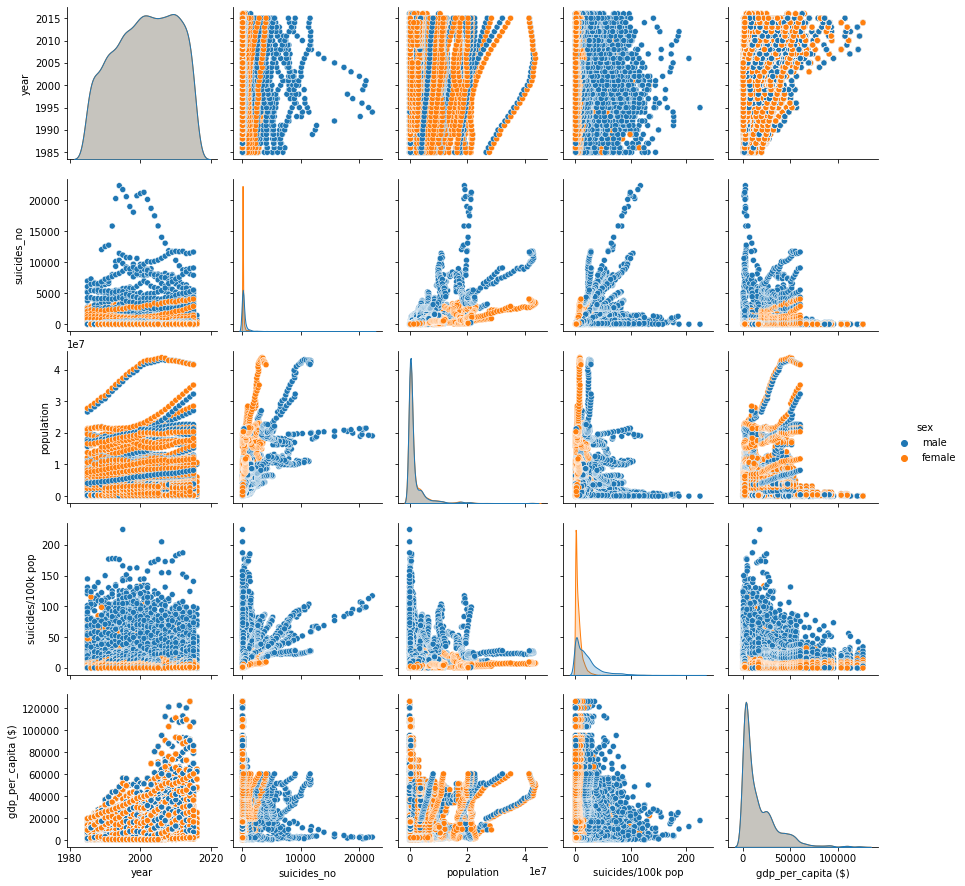

In [25]:
# creating a pairplot for sex
sns.pairplot(df,hue='sex')
plt.show()

It would be interessting to further investigate the number of suicides and the generations as there seem to be more suicides in the boomer generation.
Futhermore the relationship between number of suicides and sex seems interesting. 


### Categorical Plots

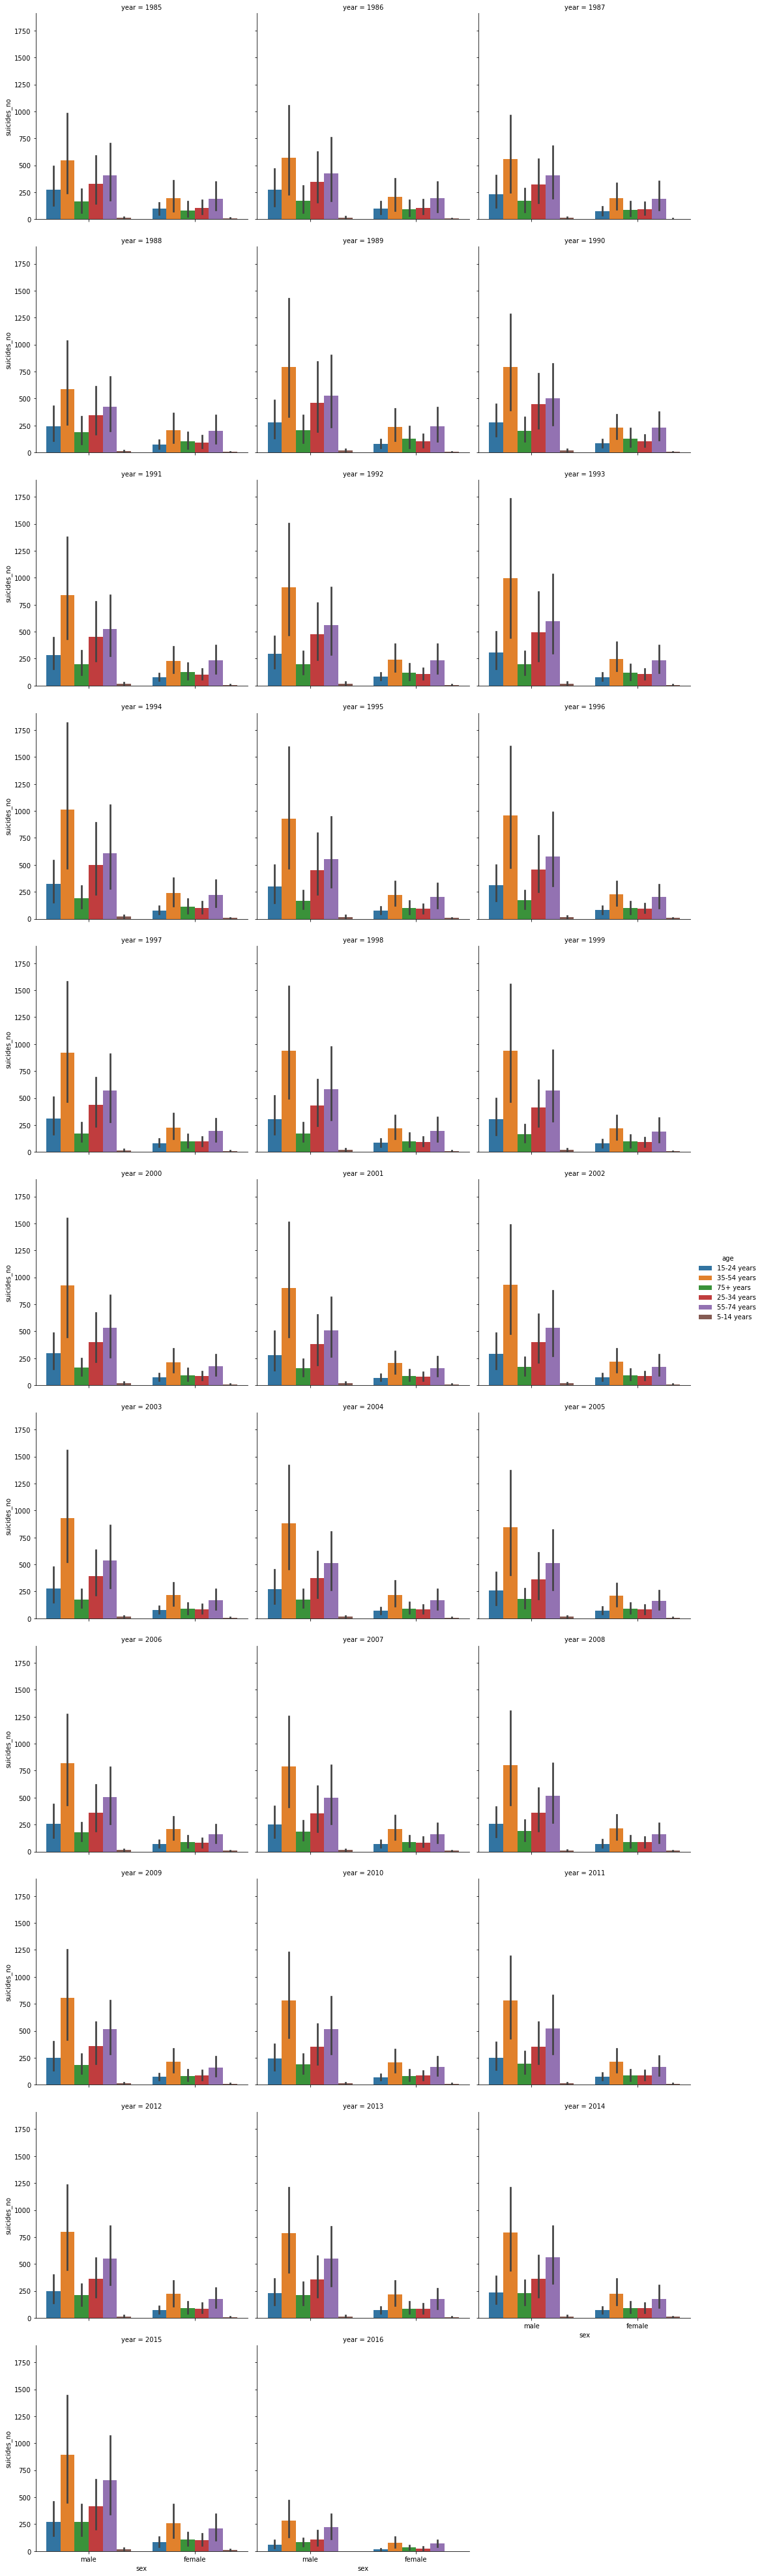

In [32]:
# plotting categorical plots to see the number of suicides sorted by sex(left is male, right female), and age per year
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=3)

As I assumed from the first sight into the dataset it is adiviseable to check the relationship between sex and suicide numbers, as more men seem to commit suicide; also a time series analysis is adviseable. Clearly, the age group between 35-54 years seem to be most affected. 